<a href="https://colab.research.google.com/github/PhongPhan2k4/Parallel_Merge_Sort/blob/main/Parallel_Merge_Sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Merge Sort**

## Import Libraries

In [295]:
import time
import numpy as np
import threading
import multiprocessing
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Merge Function

In [273]:
def merge(left_half, right_half):
    i = j = k = 0
    merged = []
    while i < len(left_half) and j < len(right_half):
        if left_half[i] < right_half[j]:
            merged.append(left_half[i])
            i += 1
        else:
            merged.append(right_half[j])
            j += 1

    while i < len(left_half):
        merged.append(left_half[i])
        i += 1

    while j < len(right_half):
        merged.append(right_half[j])
        j += 1

    return merged

## Merge Sort

In [274]:
def merge_sort(arr):
    length = len(arr)
    if length <= 1:
        return arr
    middle = length // 2
    left = merge_sort(arr[:middle])
    right = merge_sort(arr[middle:])
    return merge(left, right)

## Parallel Merge Sort using multi threads

In [275]:
def parallel_multi_thread(arr):
    # If the array is empty or contains only one element, it's already sorted.
    if len(arr) <= 1:
        return arr

    # Using merge_sort if array size is small.
    if len(arr) <= 1000:
        return merge_sort(arr)

    # Split the array into two halves
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]

    # Lists to store the sorted results of the left and right halves
    left_result = []
    right_result = []

    # Function to sort a portion of the array and store the result in a provided list
    def sort_and_store_result(arr, result):
        result.extend(merge_sort(arr))

    # Create two threads for sorting the left and right halves
    left_thread = threading.Thread(target=sort_and_store_result, args=(left, left_result))
    right_thread = threading.Thread(target=sort_and_store_result, args=(right, right_result))

    # Start the threads
    left_thread.start()
    right_thread.start()

    # Wait for the threads to finish
    left_thread.join()
    right_thread.join()

    # Merge the sorted left and right results into a single sorted array and return it
    return merge(left_result, right_result)


## Parallel Merge Sort using multi processes

In [276]:
def parallel_multi_process(arr):
    # If the array is empty or contains only one element, it's already sorted.
    if len(arr) <= 1:
        return arr

    # Using merge_sort if array size is small.
    if len(arr) <= 1000:
        return merge_sort(arr)

    # Split the array into two halves
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]

    # Function to sort a portion of the array and store the result in a provided list
    def sort_and_store_result(arr, result):
        result.extend(merge_sort(arr))

    # Lists to store the sorted results of the left and right halves
    left_result = []
    right_result = []

    # Create two processes for sorting the left and right halves
    left_process = multiprocessing.Process(target=sort_and_store_result, args=(left, left_result))
    right_process = multiprocessing.Process(target=sort_and_store_result, args=(right, right_result))

    # Start the processes
    left_process.start()
    right_process.start()

    # Wait for the processes to finish
    left_process.join()
    right_process.join()

    # Merge the sorted left and right results into a single sorted array and return it
    return merge(left_result, right_result)

## Execute

In [292]:
# Size of array to
sizes = [10, 100, 1000, 10000, 100000, 1000000]

# List to store time execute algorithms
merge_sort_time = []
multi_threads_time = []
multi_processes_time = []

for size in sizes:
  # Create random array
  arr = np.random.randint(size, size=size)

  # execute merge sort
  start = time.time()
  sorted = merge_sort(arr)
  merge_sort_time.append(time.time() - start)

  # execute parallel multi thread
  start = time.time()
  sorted = parallel_multi_thread(arr)
  multi_threads_time.append(time.time() - start)

  # execute parallel multi process
  start = time.time()
  sorted = parallel_multi_process(arr)
  multi_processes_time.append(time.time() - start)

In [293]:
dict = {'Size' : sizes, 'Merge Sort' : merge_sort_time, 'Parallel multi thread' : multi_threads_time, 'Parallel multi process' : multi_processes_time}

In [294]:
df = pd.DataFrame(dict)
df

,Size,Merge Sort,Parallel multi thread,Parallel multi process
0,10,0.000062,0.000044,0.000037
1,100,0.000538,0.000513,0.000508
2,1000,0.011986,0.012690,0.011154
3,10000,0.108063,0.112326,2.295239
4,100000,0.664332,0.696925,2.530401
5,1000000,9.792351,9.353842,9.689738


<Axes: title={'center': 'Time Chart'}>

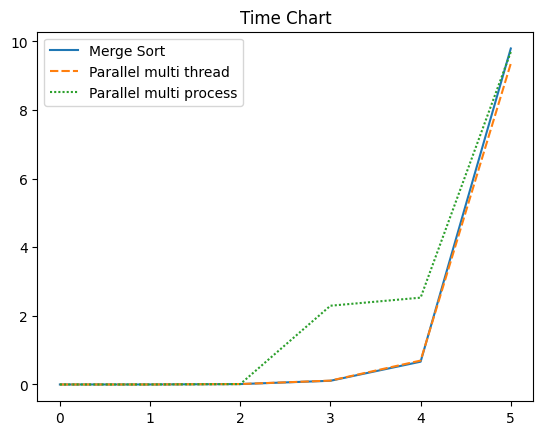

In [299]:
plt.title("Time Chart")
sns.lineplot(data=df.drop('Size', axis=1))